In [1]:
import json

In [2]:
path = './'

In [79]:
import os


cwd = os.getcwd()
dir_path  = os.path.join(cwd, path)
dirs = os.listdir(dir_path)
os.chdir(dir_path)
os.listdir(dir_path)

['raa_610-12.pdf',
 '.DS_Store',
 'raa_610_pd3f.txt',
 'raa_610-1.json',
 'raa_610-12.pd3f.txt',
 'raa_610.pdf',
 'synthese.md',
 'diff.txt',
 'raandeg534.json',
 '__pycache__',
 'test.py',
 '.ipynb_checkpoints',
 'raa_610_pd3f_fast.txt',
 'json_utils.py',
 'Syntheses',
 'pdfminer.six-develop',
 'clustering.ipynb']

In [4]:
import json
with open('raa_610-1.json') as json_file: 
    data = json.load(json_file) 

In [5]:
nb_arretes = len(data['arretes'])

In [6]:
listeTerrasse = []
listePizzas = []
for i in range(nb_arretes):
    print('Nombre d articles dans l arrete {} = {}'.format(i,len(data['arretes'][i]['articles'])))
    terrasseIsIn = False
    pizzaIsIn = False
    for article in data['arretes'][i]['articles']:
        for a in article:
            if 'terrasse' in a['text']:
                terrasseIsIn = True
            if 'pizza' in a['text']:
                pizzaIsIn = True
    if terrasseIsIn == True:
       listeTerrasse.append(i) 
    if pizzaIsIn == True:
       listePizzas.append(i) 

Nombre d articles dans l arrete 0 = 2
Nombre d articles dans l arrete 1 = 2
Nombre d articles dans l arrete 2 = 2
Nombre d articles dans l arrete 3 = 2
Nombre d articles dans l arrete 4 = 2
Nombre d articles dans l arrete 5 = 2
Nombre d articles dans l arrete 6 = 2
Nombre d articles dans l arrete 7 = 2
Nombre d articles dans l arrete 8 = 2
Nombre d articles dans l arrete 9 = 2
Nombre d articles dans l arrete 10 = 2
Nombre d articles dans l arrete 11 = 1
Nombre d articles dans l arrete 12 = 8
Nombre d articles dans l arrete 13 = 14
Nombre d articles dans l arrete 14 = 14
Nombre d articles dans l arrete 15 = 12
Nombre d articles dans l arrete 16 = 8
Nombre d articles dans l arrete 17 = 4
Nombre d articles dans l arrete 18 = 6
Nombre d articles dans l arrete 19 = 8
Nombre d articles dans l arrete 20 = 6
Nombre d articles dans l arrete 21 = 9
Nombre d articles dans l arrete 22 = 14
Nombre d articles dans l arrete 23 = 7
Nombre d articles dans l arrete 24 = 7
Nombre d articles dans l arrete

In [7]:
print('Il y a {} arretes qui contiennent le mot terrasse : '.format(len(listeTerrasse)))
print('Il y a {} arretes qui contiennent le mot pizza : '.format(len(listePizzas)))

Il y a 13 arretes qui contiennent le mot terrasse : 
Il y a 1 arretes qui contiennent le mot pizza : 


In [8]:
for arrete in listeTerrasse:
    print(arrete)
print('------------')
for arrete in listePizzas:
    print(arrete)

15
47
50
57
58
59
61
62
64
67
98
99
104
------------
52


In [81]:
import json
with open('raandeg534.json') as json_file: 
    dataBis = json.load(json_file) 

listeTerrasse = []
listePizzas = []
for i in range(len(dataBis['arretes'])):
    print('Nombre d articles dans l arrete {} = {}'.format(i,len(dataBis['arretes'][i]['articles'])))
    terrasseIsIn = False
    pizzaIsIn = False
    for article in dataBis['arretes'][i]['articles']:
        for a in article:
            if 'terrasse' in a['text']:
                terrasseIsIn = True
            if 'pizza' in a['text']:
                pizzaIsIn = True
    if terrasseIsIn == True:
       listeTerrasse.append(i) 
    if pizzaIsIn == True:
       listePizzas.append(i) 

print('Il y a {} arretes qui contiennent le mot terrasse : '.format(len(listeTerrasse)))
print('Il y a {} arretes qui contiennent le mot pizza : '.format(len(listePizzas)))

for arrete in listeTerrasse:
    print(arrete)
print('------------')
for arrete in listePizzas:
    print(arrete)

Nombre d articles dans l arrete 0 = 3
Nombre d articles dans l arrete 1 = 3
Nombre d articles dans l arrete 2 = 21
Nombre d articles dans l arrete 3 = 8
Nombre d articles dans l arrete 4 = 15
Nombre d articles dans l arrete 5 = 15
Nombre d articles dans l arrete 6 = 8
Nombre d articles dans l arrete 7 = 8
Nombre d articles dans l arrete 8 = 13
Nombre d articles dans l arrete 9 = 4
Nombre d articles dans l arrete 10 = 12
Nombre d articles dans l arrete 11 = 15
Nombre d articles dans l arrete 12 = 15
Nombre d articles dans l arrete 13 = 18
Nombre d articles dans l arrete 14 = 15
Nombre d articles dans l arrete 15 = 15
Nombre d articles dans l arrete 16 = 8
Nombre d articles dans l arrete 17 = 15
Nombre d articles dans l arrete 18 = 12
Nombre d articles dans l arrete 19 = 10
Nombre d articles dans l arrete 20 = 10
Nombre d articles dans l arrete 21 = 15
Nombre d articles dans l arrete 22 = 15
Nombre d articles dans l arrete 23 = 8
Nombre d articles dans l arrete 24 = 16
Nombre d articles 

In [9]:
def extract_text_from_json(json_path):
    with open(json_path) as json_file:
        data = json.load(json_file)

    result = ""

    for arrete in data["arretes"]:

        for line in arrete["title"]:
            result += line["text"]
        result += "\t"

        for intro in arrete["intros"]:
            for line in intro:
                result += line["text"]
            result += "\t"

        for article in arrete["articles"]:
            for line in article:
                result += line["text"]
            result += "\t"
        #result += "\n"
        result += "\n"
    return result

In [82]:
text = extract_text_from_json('raa_610-1.json')
textBis = extract_text_from_json('raandeg534.json')

In [83]:
print(len(text.split('\n')))
print(len(textBis.split('\n')))

198
85


In [84]:
import numpy as np
text = np.array(text.split('\n'))
textBis = np.array(textBis.split('\n'))
texts = np.delete(text,197)
textsBis = np.delete(textBis,84)

final = np.concatenate((texts,textsBis), axis=0)

In [85]:
print(final)

['N° 2020_02263_VDM Désignation de représentants -SOLIDEO - Madame Samia GHALI et Monsieur Benoît PAYAN\tVu le Code Général des Collectivités Territoriales et notammentses articles L. 2122-18, L. 2122-20 et L. 2122-22,\tVu le décret n°2017-1764 du 27 décembre 2017 relatif àl’établissement public Société de livraison des ouvragesolympiques,\tVu le procès-verbal d’installation du Conseil Municipal de la Villede Marseille en date du 4 juillet 2020,\tVu le procès-verbal de l’élection de Madame la Maire en date du4 juillet 2020,ARRETONS\tArticle 1 Sont désignés pour nous représenter au seinde l’établissement public Société de livraison des ouvragesolympiques (SOLIDEO) : - Madame Samia GHALI, Adjointe à la Maire en charge del’égalité des territoires, des relations euroméditerranéennes,de l’attractivité et des grands évènements Marseillais en tantque titulaire et,- Monsieur Benoît PAYAN, 1er Adjoint en charge de l’actionmunicipale pour une ville plus juste, plus verte et plusdémocratique en t

In [86]:
all_the_words = []
for text in final :
    liste = text.split(' ')
    for word in liste:
        if word not in all_the_words:
            all_the_words.append(word)

In [87]:
all_the_words = np.array(all_the_words)

In [88]:
print('Nombre de mots différents = ',len(all_the_words))

Nombre de mots différents =  13327


In [89]:
words_occurrences = np.zeros((len(final),len(all_the_words)))
for i in range(len(final)):
    tab = np.array(final[i].split(' '))
    tab = np.unique(tab,return_counts=True)
    for words in tab[0]:
        index_in_counts = np.where(tab[0] == words)
        index_in_list = np.where(all_the_words == words)
        words_occurrences[i][index_in_list] += tab[1][index_in_counts]

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
array = pca.fit_transform(words_occurrences)

In [91]:
print(array.shape)

(281, 2)


In [92]:
from sklearn.cluster import KMeans

In [93]:
kmeans = KMeans(n_clusters=2, max_iter=100, random_state=0)

In [94]:
kmeans.fit(array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [95]:
print(kmeans.cluster_centers_)

[[-40.34253828   6.07458526]
 [ 31.40590005  -4.72894929]]


In [96]:
y_kmeans = kmeans.predict(array)
print(y_kmeans.shape)

(281,)


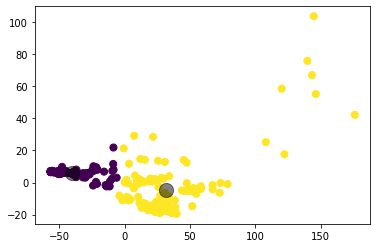

In [97]:
import matplotlib.pyplot as plt


cluster = kmeans.cluster_centers_
plt.scatter(array[:, 0], array[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(cluster[:, 0], cluster[:, 1], c='black', s=200, alpha=0.5)

In [98]:
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]


In [99]:
print([i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 1])

[12, 13, 14, 15, 16, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 199, 200, 201, 202, 205, 207, 208, 209, 210, 211, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 258, 264, 275, 278]


In [100]:
arretesInteressants = []
for f in final:
    if 'terrasse' in f or 'pizza' in f:
        arretesInteressants.append(f)

In [102]:
print(len(arretesInteressants))

39


In [104]:
all_the_words = []
for text in arretesInteressants :
    liste = text.split(' ')
    for word in liste:
        if word not in all_the_words:
            all_the_words.append(word)
all_the_words = np.array(all_the_words)
print('Nombre de mots différents = ',len(all_the_words))

Nombre de mots différents =  4038


In [105]:
words_occurrences = np.zeros((len(arretesInteressants),len(all_the_words)))
for i in range(len(arretesInteressants)):
    tab = np.array(arretesInteressants[i].split(' '))
    tab = np.unique(tab,return_counts=True)
    for words in tab[0]:
        index_in_counts = np.where(tab[0] == words)
        index_in_list = np.where(all_the_words == words)
        words_occurrences[i][index_in_list] += tab[1][index_in_counts]

In [106]:
pca = PCA(n_components=2)
array = pca.fit_transform(words_occurrences)
print(array.shape)
kmeans = KMeans(n_clusters=2, max_iter=100, random_state=0)
kmeans.fit(array)
y_kmeans = kmeans.predict(array)

(39, 2)


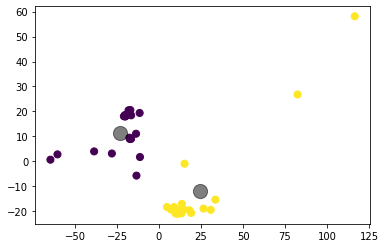

In [107]:
cluster = kmeans.cluster_centers_
plt.scatter(array[:, 0], array[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(cluster[:, 0], cluster[:, 1], c='black', s=200, alpha=0.5)